3. 定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

   函数前两个输入为 0,1,2 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

   可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

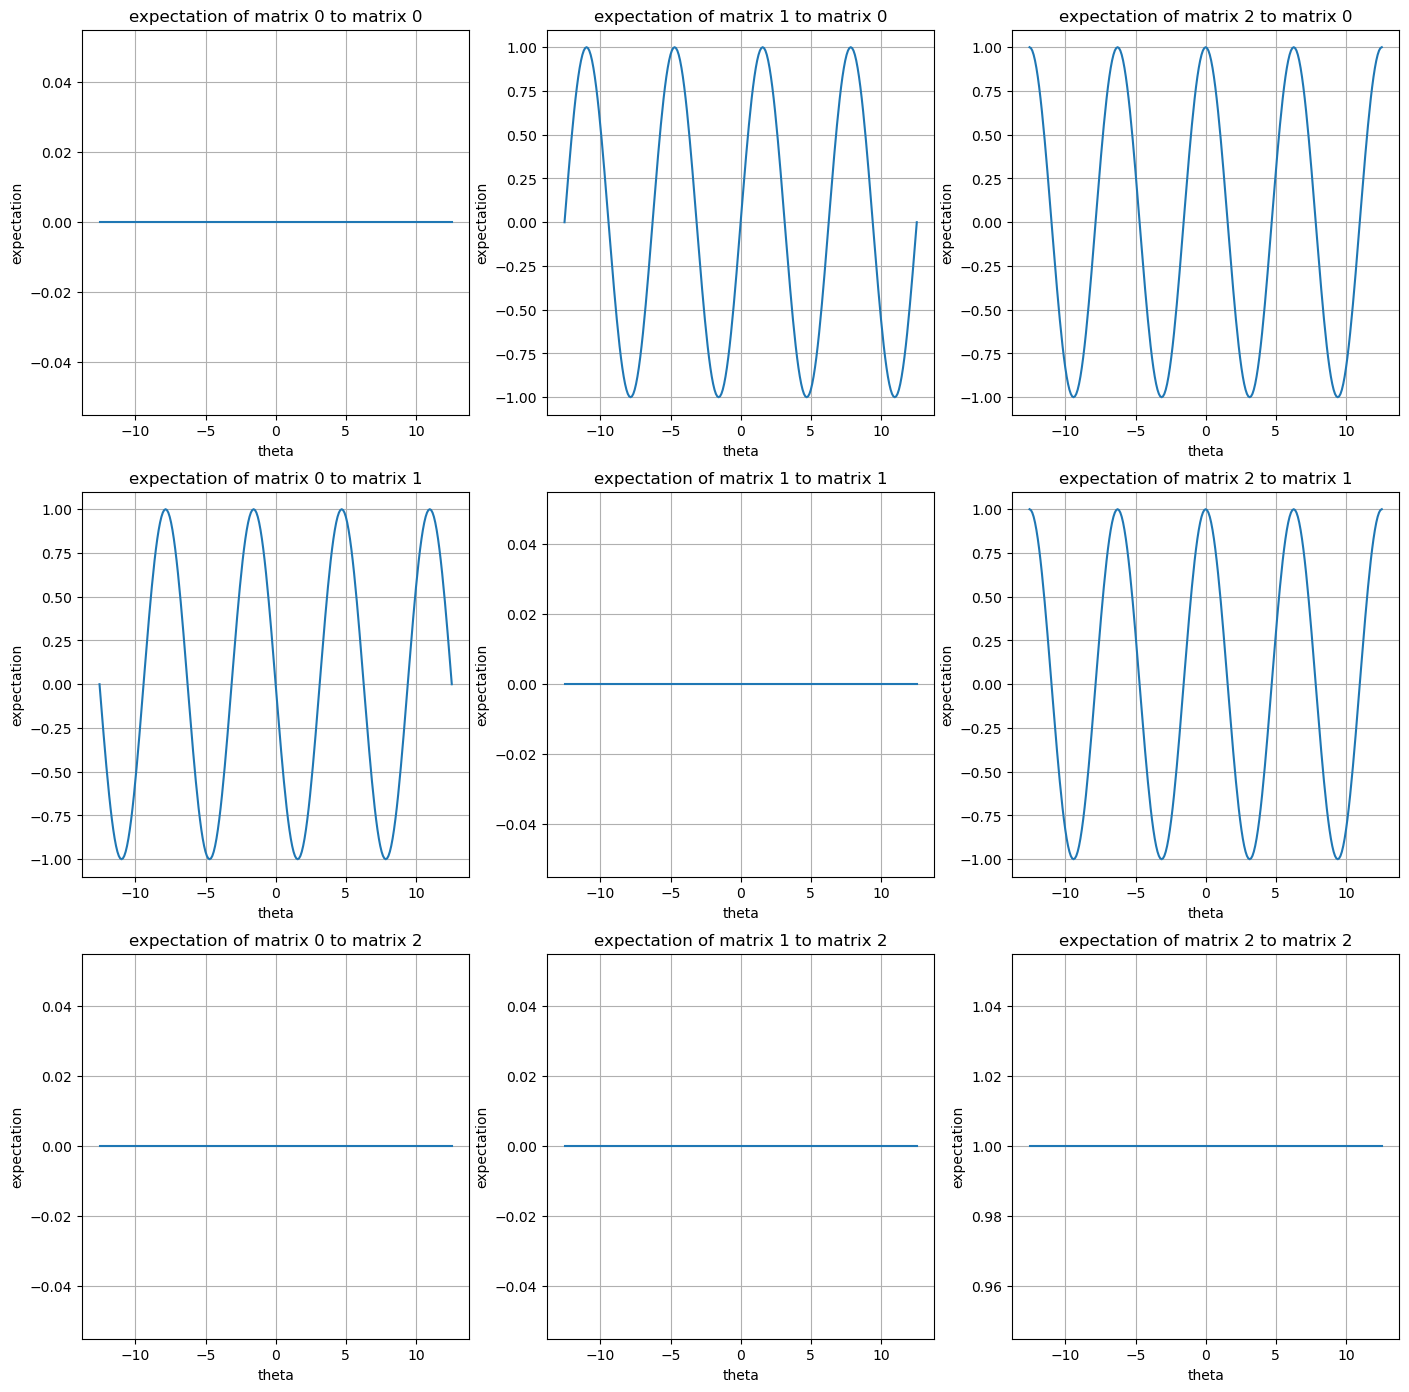

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
from math import cos,sin,pi

sigma_X = np.array([[0, 1], [1, 0]])
sigma_Y = np.array([[0, -1j], [1j, 0]])
sigma_Z = np.array([[1, 0], [0, -1]])
pauli = [sigma_X, sigma_Y, sigma_Z]

def calc(id_P,id_Q,theta):
    P = pauli[id_P]
    Q = pauli[id_Q]
    v0 = np.array([1, 0])
    v = la.expm(1j * (theta/2) * P) @ v0
    E = v.conj().T @ Q @ v
    return E.real

x = np.arange(-4 * pi, 4 * pi + 1e-9, pi / 32)
plt.figure(figsize=(17, 17))
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.plot(x, [calc(i, j, theta) for theta in x])
        plt.title("expectation of matrix "+str(j)+" to matrix "+str(i))
        plt.xlabel('theta')
        plt.ylabel('expectation')
        plt.grid(True)


通过可视化我们发现，$9$ 个函数中有 $4$ 个是正弦函数（的拉伸与平移），$4$ 个是恒等于 $0$ 的函数，$1$ 个是恒等于 $1$ 的函数。